# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---
**The code in the next four blocks work:** <br>
This code was use to gather my data and make the CSV File.<br>   However, once it worked and I got my CSV file, I commented the code out so that I was not making +600 API calls every time I reset and re-ran my analysis.

In [2]:
# # Empty list for holding the latitude and longitude combinations
# lat_lngs = []

# # Empty list for holding the cities names
# cities = []

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(cities)}")

# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code<br>

**The code in this blocks work:** <br>
This code was use to gather my data and make the CSV File.<br>   However, once it worked and I got my CSV file, I commented the code out so that I was not making +600 API calls every time I reset and re-ran my analysis.


In [3]:
# # Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="


# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# # for i, city in enumerate(cities[0:55]):                           ################ us this one for testing - it limits the number of api calls. 
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url= query_url + city
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         # city_weather = # YOUR CODE HERE
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['clouds']['all']
#         city_wind_speed = city_weather['wind']['speed']
#         city_wind_direction = city_weather['wind']['deg']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']


#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind_speed,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [4]:
# Export the City_Data into a csv
#city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
#city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.head()

# Working from now on using the saved csv file to avoid repeated API calls 

In [6]:
# Read saved data
city_data = pd.read_csv("output/cities.csv", index_col="City_ID")


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        555 non-null    object 
 1   Lat         555 non-null    float64
 2   Lng         555 non-null    float64
 3   Max Temp    555 non-null    float64
 4   Humidity    555 non-null    int64  
 5   Cloudiness  555 non-null    int64  
 6   Wind Speed  555 non-null    float64
 7   Country     551 non-null    object 
 8   Date        555 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.4+ KB


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,12.71,90,23,1.79,ZA,1667264247
1,barrow,71.2906,-156.7887,-21.99,84,0,5.14,US,1667263729
2,kodiak,57.7900,-152.4072,0.44,46,2,13.69,US,1667264248
3,faya,18.3851,42.4509,13.06,61,5,1.10,SA,1667264248
4,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1667263732


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

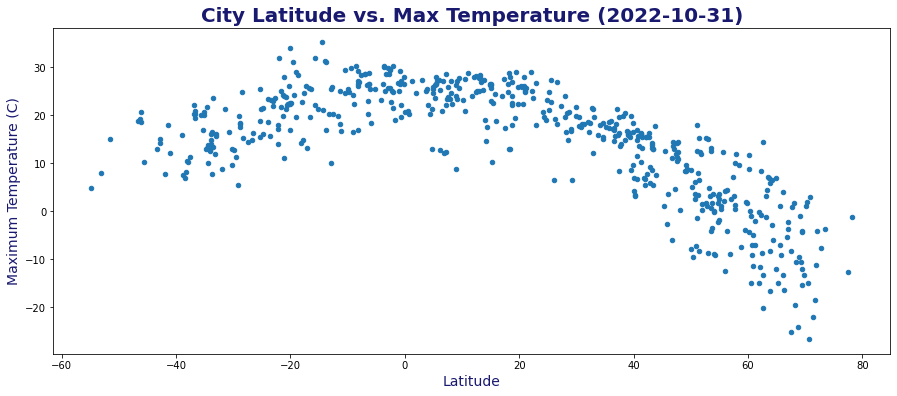

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( x='Lat', y='Max Temp', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Maximum Temperature (C)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude vs. Max Temperature (2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");

fignum = 1
filename = f'Fig{fignum}_Lat_vs_Temp.jpg'
save_fig = os.path.join('.','output', filename )                         # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                               # Save the figure
fignum +=1

# Show plot
plt.show()

#### Latitude Vs. Humidity

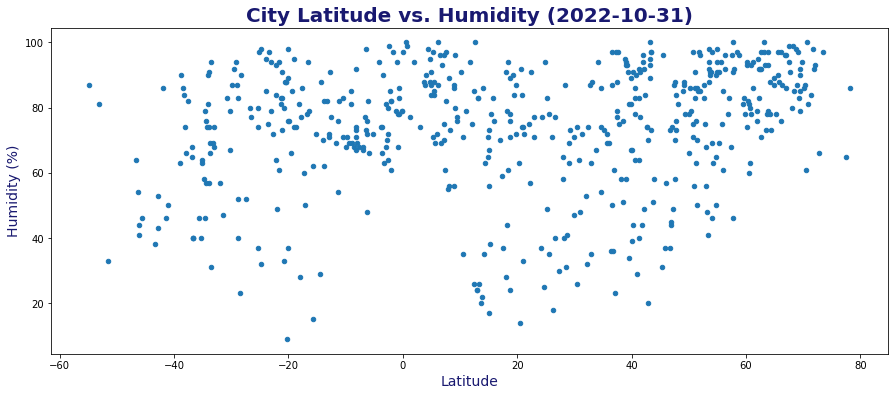

In [10]:
# Build the scatter plots for latitude vs. humidity

city_data_df.plot.scatter( x='Lat', y='Humidity', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Humidity (%)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude vs. Humidity (2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");

filename = f'Fig{fignum}_Lat_vs_Humidity.jpg'
save_fig = os.path.join('.','output', filename )                         # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                               # Save the figure
fignum += 1

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

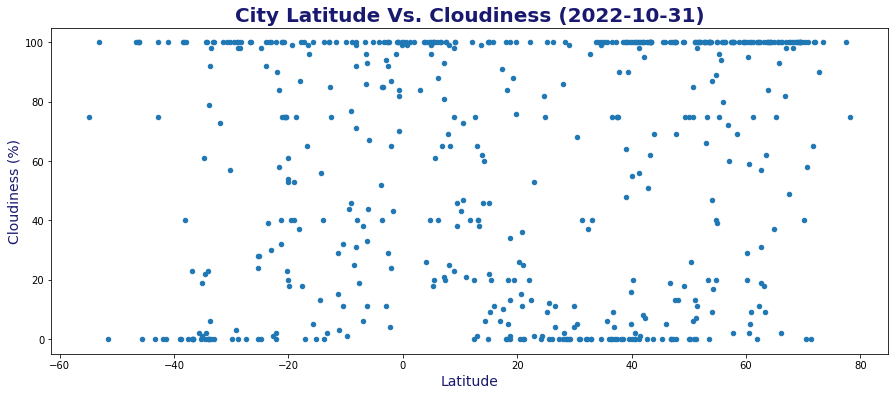

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter( x='Lat', y='Cloudiness', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Cloudiness (%)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude Vs. Cloudiness (2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', 'Fig3_Lat_vs_Cloudiness.jpg')             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                                      # Save the figure
fignum += 1

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

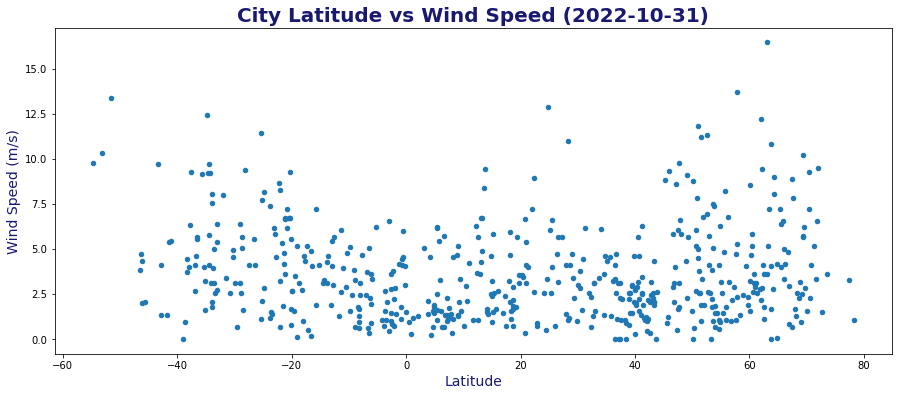

In [12]:
# Build the scatter plots for latitude vs. wind speed
# I took an different approach at this point.  I became apparent that charts were going to be repetitive, 
# so I seperated the variable parts to the top of the code block to make them easier to edit.
# This was clearly the perfect decission once I got to Requirements 2.

title='City Latitude vs Wind Speed (2022-10-31)'
ylabel = 'Wind Speed (m/s)'
xlabel = 'Latitude'
ycol = 'Wind Speed'
xcol = 'Lat'
numfig = 4
filename = f'Fig{numfig}_{xlabel}_vs_Wind_speed.jpg'

# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter( x=xcol, y=ycol, figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel(xlabel, fontsize = 14, color = 'midnightblue' )
plt.ylabel(ylabel, fontsize = 14, color = 'midnightblue')
plt.title(title, 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', filename)             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                  # Save the figure
fignum += 1

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_weather(dff,titlef,ylabelf,xlabelf,ycolf,xcolf,fignum,filenamef):
    # bring the argument into the function
    df = dff                                          # set the data frame
    title=titlef                                                # set the title
    ylabel = ylabelf                                            # set the y label
    xlabel = xlabelf                                            # set the x label
    ycol = ycolf                                                # choose the y col
    xcol = xcolf                                                # choose the x col
    numfig = fignum                                             # set the figure number
    filenamepart=filenamef                                      # set the end of the filename
    
    # fix the data and filename
    xdata = df[xcol]                                            # set the x data
    ydata = df[ycol]                                            # set the y data
    filename = f'Fig{numfig}_{xlabel}_vs_{filenamepart}.jpg'    # set the filename

    # linear Regression equation calculation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept

    # create a string annoation that for the equation of the line and r**2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_square_str = f'R-Squared = {round(rvalue**2,2)}'

    # locate the annoation of the linear regression line and R^2 
    linX = xdata.min() + (xdata.max() - xdata.min())*0.01       # locate the linear regression equation annotation 1% to the right of the smallest x value
    linY = ydata.min() + (ydata.max() - ydata.min())*0.01       # locate the linear regression equation and r^2 annoation 1% above of the lowest value
    r2x = xdata.min() + (xdata.max() - xdata.min())*0.3         # locate the r^2 value 30% to the right of the smallest x value

    # Build the scatter plots for latitude vs. cloudiness
    df.plot.scatter( x=xcol, y=ycol, figsize=(15, 6))           # create the scatter plot
    plt.plot(xdata,regress_values,'red')                        # plot the regression line

    # Incorporate the other graph properties
    plt.xlabel(xlabel, fontsize = 14, color = 'midnightblue' )  # Plot the x-axis label description
    plt.ylabel(ylabel, fontsize = 14, color = 'midnightblue')   # Plot the y-axis lable description
    plt.title(title,                                            # plot the title
            fontsize = 20, 
            color = 'midnightblue', 
            fontweight="bold");
    plt.annotate(line_eq,(linX,linY),fontsize=15,color="darkred");      # This code plots the equation of the line
    plt.annotate(r_square_str,(r2x,linY),fontsize=15,color="darkred");  # Add the r-squared value to the regression

    # Save the fig 
    save_fig = os.path.join('.','output', filename)             # Prepare to save the figure  
    plt.savefig(save_fig, bbox_inches='tight')                  # Save the figure


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,-21.99,84,0,5.14,US,1667263729
2,kodiak,57.7900,-152.4072,0.44,46,2,13.69,US,1667264248
3,faya,18.3851,42.4509,13.06,61,5,1.10,SA,1667264248
5,norman wells,65.2820,-126.8329,-14.98,78,75,7.20,CA,1667264248
11,kapaa,22.0752,-159.3190,28.99,75,20,7.20,US,1667263723


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,12.71,90,23,1.79,ZA,1667264247
4,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1667263732
6,atuona,-9.8000,-139.0333,24.93,71,1,5.13,PF,1667264249
7,constitucion,-35.3333,-72.4167,17.01,40,0,3.98,CL,1667264249
8,busselton,-33.6500,115.3333,16.50,66,92,3.11,AU,1667263725


###  Temperature vs. Latitude Linear Regression Plot

(370, 9)

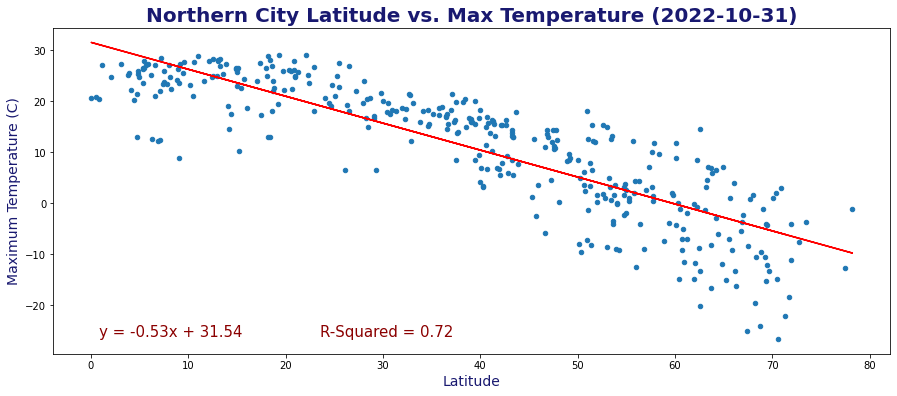

In [16]:
# Linear regression on Northern Hemisphere, set the arguments
dff = northern_hemi_df
titlef = 'Northern City Latitude vs. Max Temperature (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Maximum Temperature (C)'
xcolf = 'Lat'
ycolf = 'Max Temp'
filenamef = 'Max_Temp'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1
dff.shape

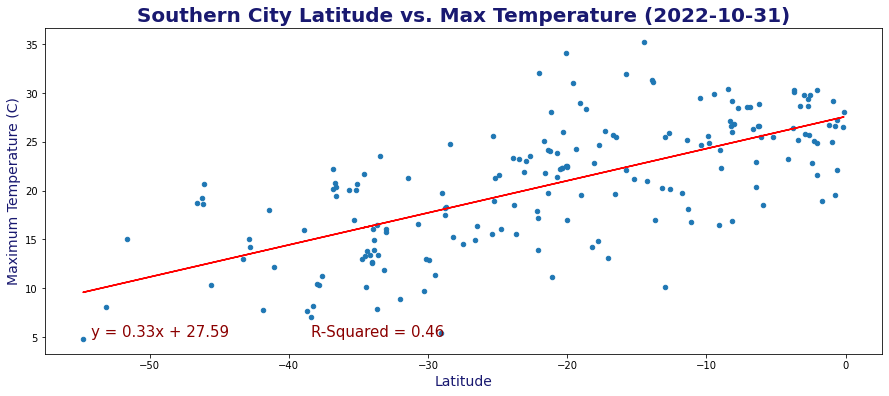

In [17]:
# Linear regression on Southern Hemisphere, set the arguments 
dff = southern_hemi_df
titlef = 'Southern City Latitude vs. Max Temperature (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Maximum Temperature (C)'
xcolf = 'Lat'
ycolf = 'Max Temp'
filenamef = 'Max_Temp'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

**Discussion about the linear relationship between latitude and Temperature:** <br>
On October 31, 2022, in the northern hemisphere, the latitude explains the temperature variation between cities to a great degree than in the southern hemisphere.  We see this in the R-squared values of 0.72 for the north and 0.46 for the south.<br><br>
We also see from the data what we expect, temperatures near the equarter (latitude = 0) tend to be warmer than latitudes closer to the poles.

### Humidity vs. Latitude Linear Regression Plot

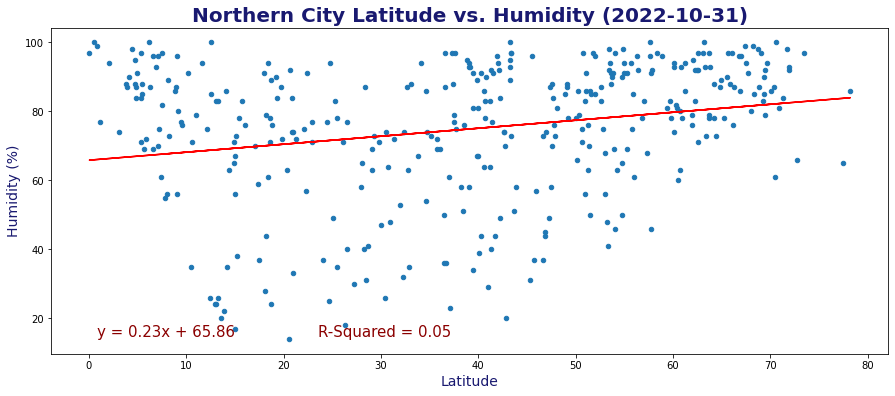

In [18]:
# Northern Hemisphere, set the arguments 
dff = northern_hemi_df
titlef = 'Northern City Latitude vs. Humidity (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Humidity (%)'
xcolf = 'Lat'
ycolf = 'Humidity'
filenamef = 'Humidity'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

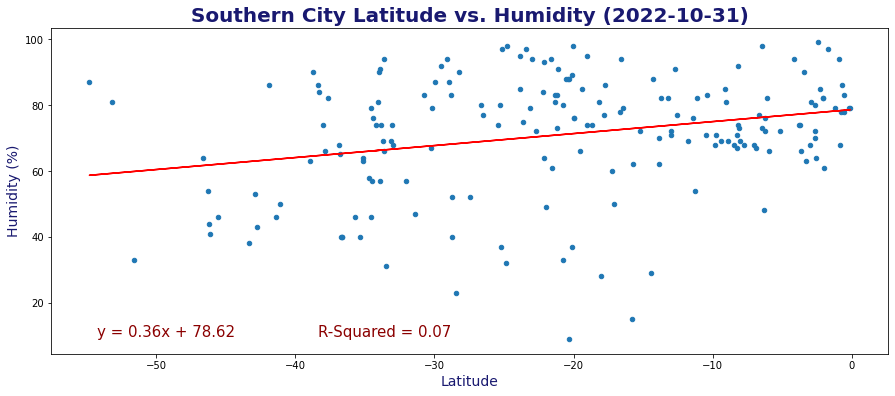

In [19]:
# Southern Hemisphere, Set the arguments 
dff = southern_hemi_df
titlef = 'Southern City Latitude vs. Humidity (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Humidity (%)'
xcolf = 'Lat'
ycolf = 'Humidity'
filenamef = 'Humidity'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

**Discussion about the linear relationship between latitude and Humidity:** <br> On October 31, 2022, latitude did not explain a meaningful variation in the Humidity levels in the northern hemisphere (r-squared = 0.05) or the southern hemisphere r-squared = 0.07).  

### Cloudiness vs. Latitude Linear Regression Plot

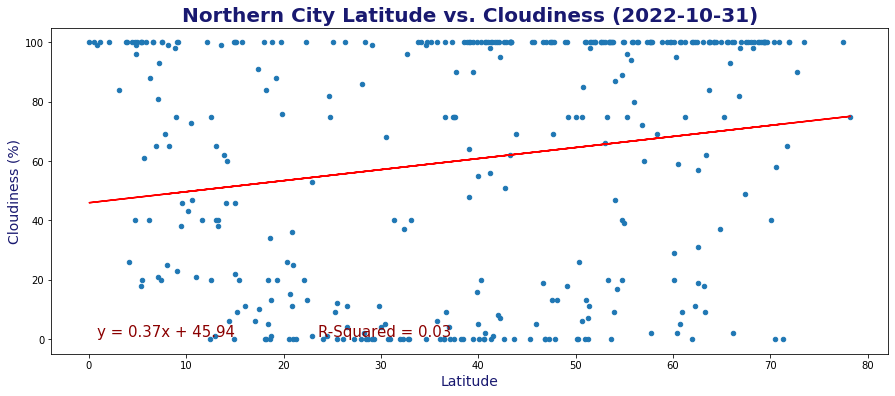

In [20]:
# Northern Hemisphere, Set the arguments 
dff = northern_hemi_df
titlef = 'Northern City Latitude vs. Cloudiness (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Cloudiness (%)'
xcolf = 'Lat'
ycolf = 'Cloudiness'
filenamef = 'Cloudiness'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

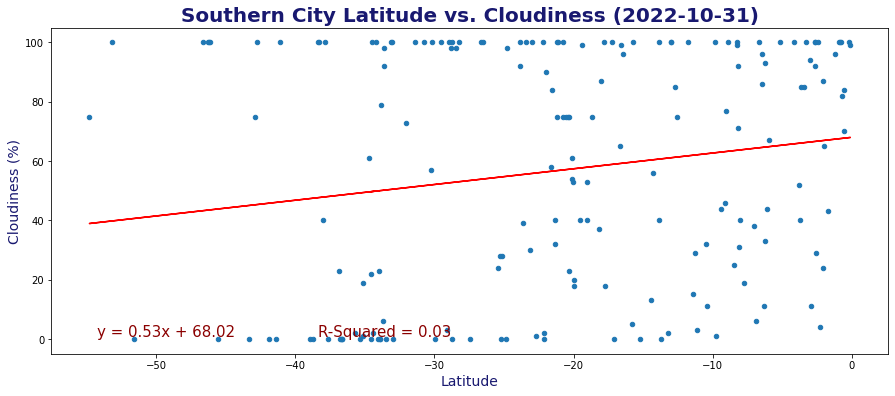

In [21]:
# Southern Hemisphere, Set the arguments 
dff = southern_hemi_df
titlef = 'Southern City Latitude vs. Cloudiness (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Cloudiness (%)'
xcolf = 'Lat'
ycolf = 'Cloudiness'
filenamef = 'Cloudiness'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

**Discussion about the linear relationship between latitude and Cloudiness:** <br>On October 31, 2022, latitude did not explain a meaningful variation in the cloudiness levels in the northern hemisphere (r-squared = 0.03) or the southern hemisphere r-squared = 0.03).  

### Wind Speed vs. Latitude Linear Regression Plot

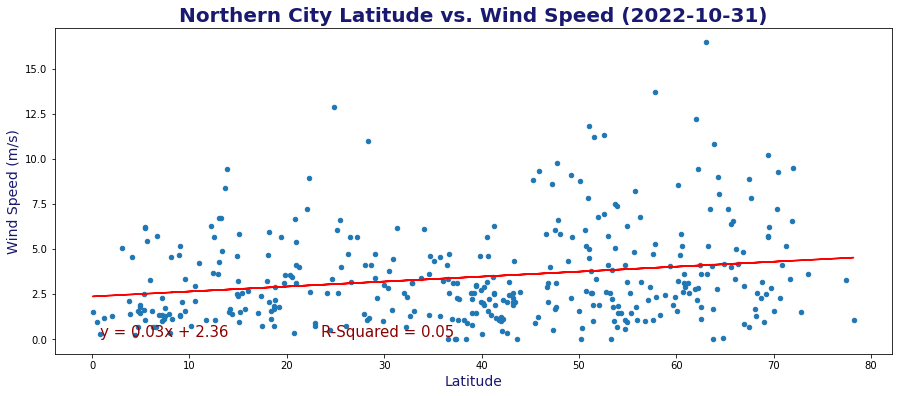

In [22]:
# Northern Hemisphere, Set the arguments 
dff = northern_hemi_df
titlef = 'Northern City Latitude vs. Wind Speed (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Wind Speed (m/s)'
xcolf = 'Lat'
ycolf = 'Wind Speed'
filenamef = 'Wind'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

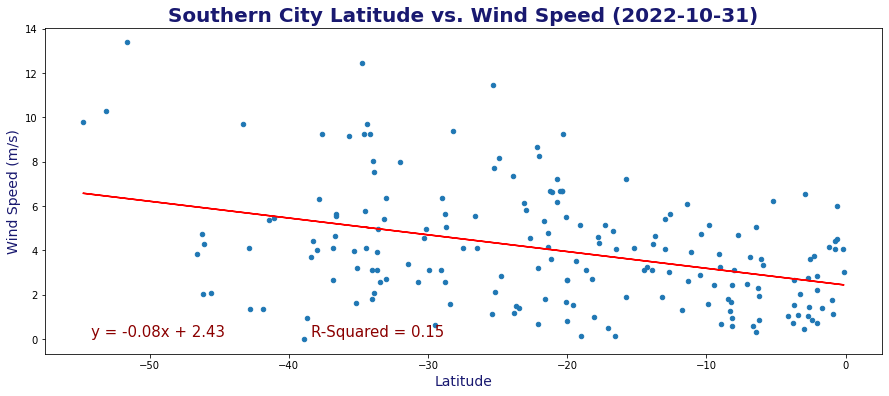

In [23]:
# Southern Hemisphere, Set the arguments 
dff = southern_hemi_df
titlef = 'Southern City Latitude vs. Wind Speed (2022-10-31)'
xlabelf = 'Latitude'
ylabelf = 'Wind Speed (m/s)'
xcolf = 'Lat'
ycolf = 'Wind Speed'
filenamef = 'Wind'

# call the function
plot_weather(dff, titlef, ylabelf, xlabelf, ycolf, xcolf, fignum, filenamef)
fignum += 1

**Discussion about the linear relationship:** <br>On October 31, 2022, latitude did not explain a meaningful variation in the cloudiness levels in the northern hemisphere (r-squared = 0.05) or the southern hemisphere r-squared = 0.15).  

**Conclusions about the linear relationship between latitude and the weather:** <br>On October 31, 2022, we found that latitude has almost no relationship to the weather.  The latitude was able to account for nearly 70% of the variation in the temperature, but that still leaves 30% of the variation unexplained.  For humidity, cloudiness, and wind speed, latitude typically explained less than 10% of the variations of those weather categories. <br><br>
Does this mean that latitude is not a good predictor of weather?  Intuitively, I would say it is not a good explainer of the weather but would likely explain more of the variation in the climate.  To prove this, we would need to collect data on more days and control for the time of day.
